This python script uses PCA to visualize in 2D the data for the interaction of two signals in an optical fiber. The target variable is the energy E.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load the dataset

In [2]:
df = pd.read_csv('Data-Energy.dat')

In [3]:
df.head()

,B2,G,DO,Dz,P1,P2,E
0,0.0050,0.002,5,0.5,100,10,0.794660
1,0.0075,0.002,5,0.5,100,10,1.306685
2,0.0100,0.002,5,0.5,100,10,1.565490
3,0.0150,0.002,5,0.5,100,10,1.743379
4,0.0200,0.002,5,0.5,100,10,1.789472


## Correlation with target variable

In [4]:
df.corr()['E'].abs().sort_values(ascending=False)

E     1.000000
P2    0.787279
P1    0.462497
Dz    0.358922
G     0.289597
DO    0.185260
B2    0.101498
Name: E, dtype: float64

## Select the features

In [5]:
cols = df.columns.values
cols

array(['B2', 'G', 'DO', 'Dz', 'P1', 'P2', 'E'], dtype=object)

In [6]:
x = df[cols[0:6]] # B2, G, DO, Dz, P1, P2
y = df[cols[6]] # E

## Scale the features for PCA

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Dimensionality Reduction with PCA

In [8]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

In [9]:
pca.explained_variance_ratio_

array([ 0.19322283,  0.1850111 ])

In [10]:
x_reduced.shape

(43, 2)

## Plot the first two principal components

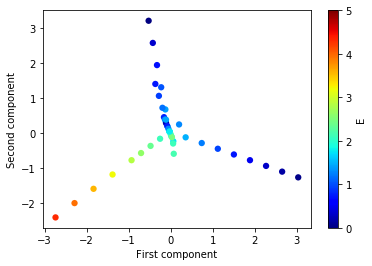

In [11]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], cmap = "jet", c = y, marker = "o", edgecolor = "none", s = 40*np.ones(43), vmin = 0, vmax = 5)
cbar = plt.colorbar()
cbar.set_label("E")
cbar.set_ticks([0,1,2,3,4,5,6,7,8,9])
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()